In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import gradient_descent_v2
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
df = pd.read_pickle('training_data.pkl')
X_train = df['X_train']
y_train = df['y_train']
y_train = y_train.astype('uint8')
X_train = np.array(X_train.tolist())
y_train = np.array(y_train.tolist())

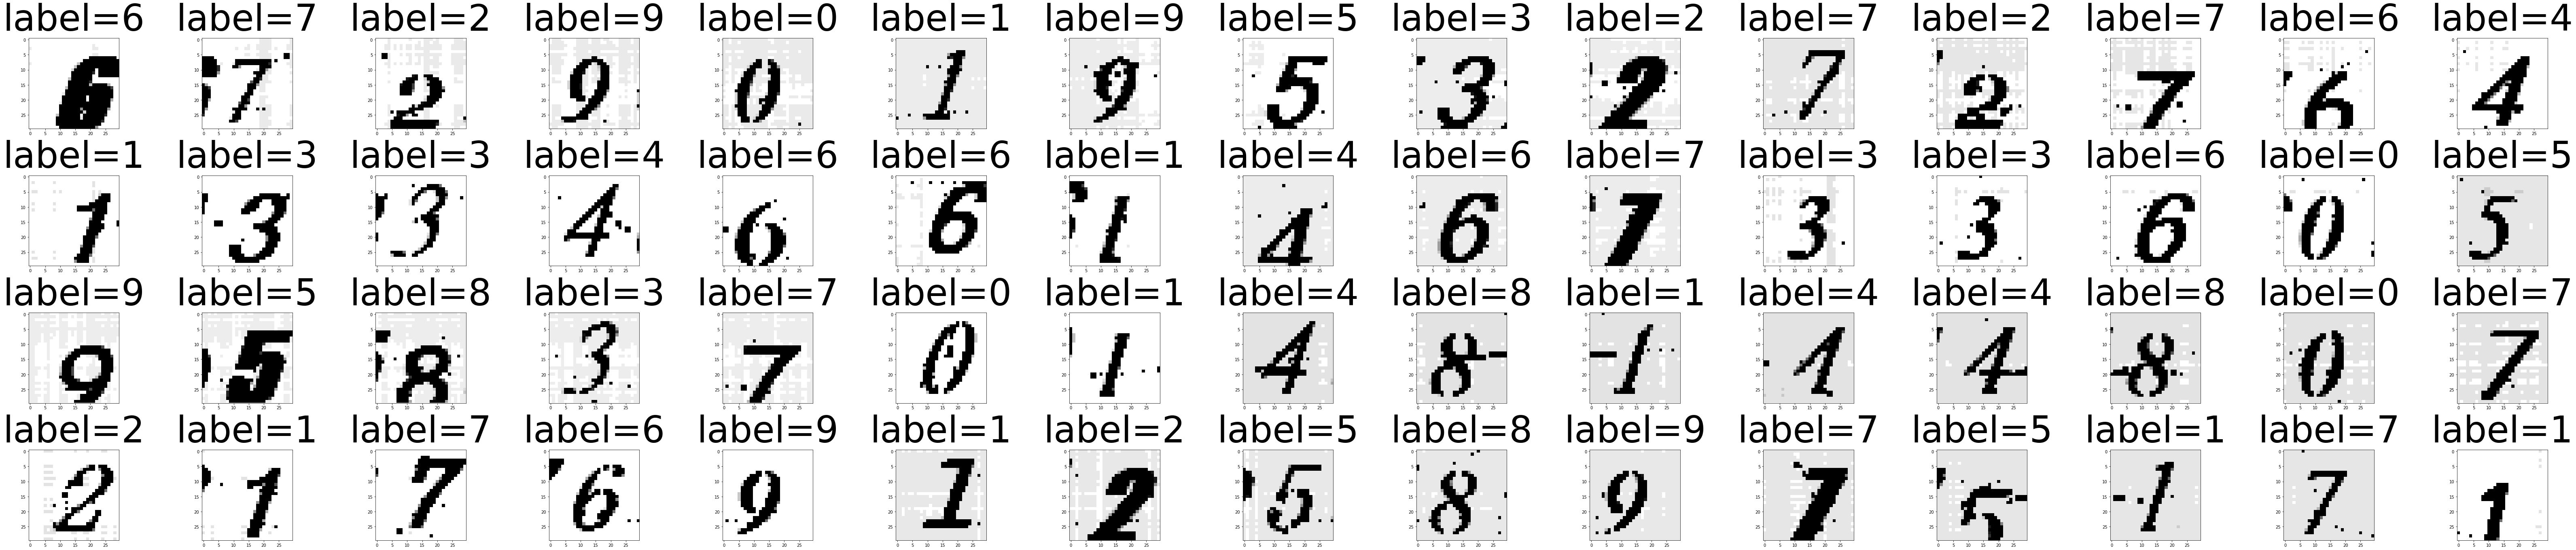

In [3]:
plt.figure(figsize=(90, 19)) #印出60張圖片及其標籤
for i in range(60):
    plt.subplot(4, 15, i+1)
    num = 21960
    plt.imshow(X_train[num+i], cmap='gray')
    plt.title(f'label={y_train[num+i]}', fontsize=90)
plt.tight_layout()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [5]:
X_train = X_train.reshape(len(X_train), 30, 30, 1)
X_test = X_test.reshape(len(X_test), 30, 30, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()
model.add(Conv2D(32, 3, 3, padding='same', input_shape = (30, 30, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, 3, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Activation('relu'))
model.add((Dense(300)))
model.add(Activation('relu'))
model.add((Dense(500)))
model.add(Activation('relu'))
model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='mse', optimizer=gradient_descent_v2.SGD(learning_rate=0.05),
             metrics=['accuracy'])

Metal device set to: Apple M1


2023-03-14 14:49:07.797426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-14 14:49:07.798067: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.fit(X_train, y_train, batch_size=150, epochs=15)#訓練第一次

2023-03-14 14:49:08.181901: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-03-14 14:49:08.185041: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2023-03-14 14:49:18.063288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 12s 18ms/step - loss: 0.0902 - accuracy: 0.1034
Epoch 2/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0899 - accuracy: 0.1308
Epoch 3/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0897 - accuracy: 0.1730
Epoch 4/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0896 - accuracy: 0.1780
Epoch 5/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0895 - accuracy: 0.1763
Epoch 6/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0894 - accuracy: 0.2017
Epoch 7/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0893 - accuracy: 0.2264
Epoch 8/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0892 - accuracy: 0.2391
Epoch 9/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0891 - accuracy: 0.2369
Epoch 10/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0889 - accuracy: 0.2605

In [8]:
model.evaluate(X_test, y_test)
pred = model.predict_classes(X_test)

  9/218 [>.............................] - ETA: 1s - loss: 0.0865 - accuracy: 0.3542  

2023-03-14 14:49:45.096683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


218/218 [==============================] - 2s 6ms/step - loss: 0.0871 - accuracy: 0.3126


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2023-03-14 14:49:46.867436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## 準確率3成時，印出測試資料前60張圖片

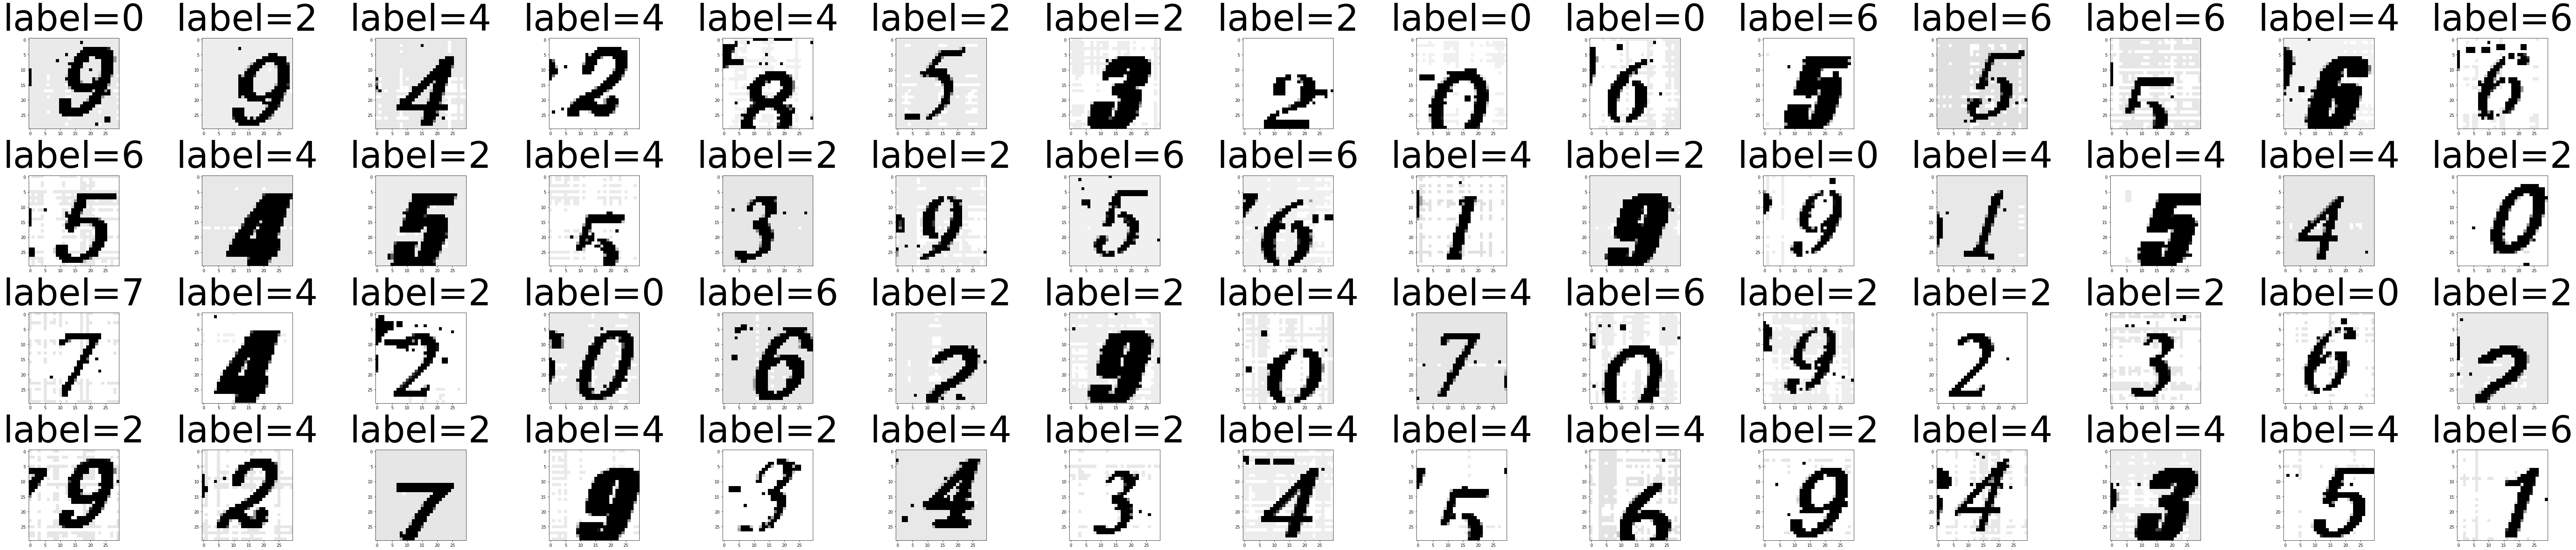

In [9]:
plt.figure(figsize=(90, 19))
for i in range(60):
    plt.subplot(4, 15, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'label={pred[i]}', fontsize=90)
plt.tight_layout()

## 第二到第八次訓練

In [10]:
for i in range(1, 8):
    print(f'=========================================第{i+1}次訓練========================================')
    model.fit(X_train, y_train, batch_size=150, epochs=15)

=========================================第2次訓練========================================
Epoch 1/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0868 - accuracy: 0.2987
Epoch 2/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0861 - accuracy: 0.3031
Epoch 3/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0851 - accuracy: 0.3216
Epoch 4/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0837 - accuracy: 0.3328
Epoch 5/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0820 - accuracy: 0.3623
Epoch 6/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0799 - accuracy: 0.3874
Epoch 7/15
109/109 [==============================] - 2s 17ms/step - loss: 0.0775 - accuracy: 0.4122
Epoch 8/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0749 - accuracy: 0.4327
Epoch 9/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0722 - accuracy: 0.4584
Epoc

109/109 [==============================] - 2s 16ms/step - loss: 0.0023 - accuracy: 0.9880
Epoch 2/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0022 - accuracy: 0.9893
Epoch 3/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0020 - accuracy: 0.9906
Epoch 4/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0019 - accuracy: 0.9907
Epoch 5/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0018 - accuracy: 0.9921
Epoch 6/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0017 - accuracy: 0.9929
Epoch 7/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0017 - accuracy: 0.9930
Epoch 8/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0016 - accuracy: 0.9934
Epoch 9/15
109/109 [==============================] - 2s 18ms/step - loss: 0.0015 - accuracy: 0.9933
Epoch 10/15
109/109 [==============================] - 2s 16ms/step - loss: 0.0014 - accuracy: 0.9938


In [11]:
model.evaluate(X_test, y_test)
pred = model.predict_classes(X_test)

218/218 [==============================] - 1s 6ms/step - loss: 0.0020 - accuracy: 0.9874


## 最後印出測試資料前60張圖片，皆預測正確

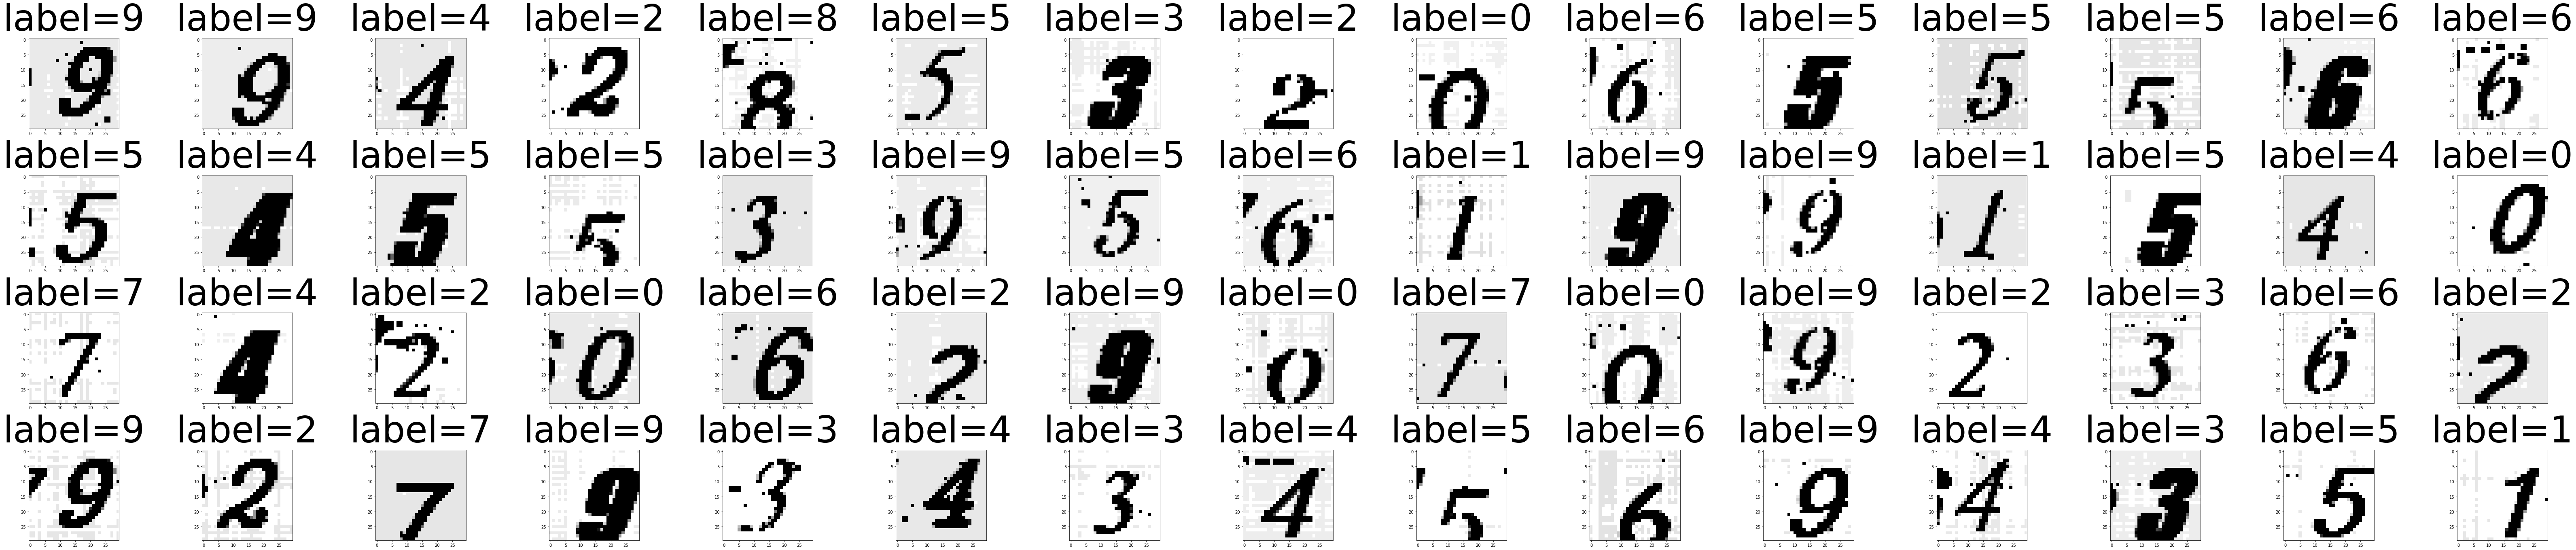

In [12]:
plt.figure(figsize=(90, 19))
for i in range(60):
    plt.subplot(4, 15, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'label={pred[i]}', fontsize=90)
plt.tight_layout()

In [14]:
model.save('./cnn_model.h5')